# PROJECT ON SPAM AND NON SPAM MAILS DETECTION & PREDICTION BY NATURAL LANGUAGE PROCESSING(NLP)

PROJECT BY MAUZUM SHAMIL

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
import os
import re
import string
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [4]:
df1 = pd.read_csv(r'c:\Users\dell\Desktop\SMS_train.csv',encoding='latin1')

In [5]:
df1

,S. No.,Message_body,Label
0,1,Rofl. Its true to its name,Non-Spam
1,2,The guy did some bitching but I acted like i'd...,Non-Spam
2,3,"Pity, * was in mood for that. So...any other s...",Non-Spam
3,4,Will ü b going to esplanade fr home?,Non-Spam
4,5,This is the 2nd time we have tried 2 contact u...,Spam
...,...,...,...
952,953,hows my favourite person today? r u workin har...,Non-Spam
953,954,How much you got for cleaning,Non-Spam
954,955,Sorry da. I gone mad so many pending works wha...,Non-Spam
955,956,Wat time ü finish?,Non-Spam


In [6]:
df1.columns

Index(['S. No.', 'Message_body', 'Label'], dtype='object')

In [7]:
df = df1.drop('S. No.',axis=1)

In [8]:
df

,Message_body,Label
0,Rofl. Its true to its name,Non-Spam
1,The guy did some bitching but I acted like i'd...,Non-Spam
2,"Pity, * was in mood for that. So...any other s...",Non-Spam
3,Will ü b going to esplanade fr home?,Non-Spam
4,This is the 2nd time we have tried 2 contact u...,Spam
...,...,...
952,hows my favourite person today? r u workin har...,Non-Spam
953,How much you got for cleaning,Non-Spam
954,Sorry da. I gone mad so many pending works wha...,Non-Spam
955,Wat time ü finish?,Non-Spam


In [9]:
df.isna().sum()

Message_body    0
Label           0
dtype: int64

In [10]:
df.describe()

,Message_body,Label
count,957,957
unique,945,2
top,"Sorry, I'll call later",Non-Spam
freq,4,835


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 957 entries, 0 to 956
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Message_body  957 non-null    object
 1   Label         957 non-null    object
dtypes: object(2)
memory usage: 15.1+ KB


In [12]:
df.dtypes

Message_body    object
Label           object
dtype: object

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 957 entries, 0 to 956
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Message_body  957 non-null    object
 1   Label         957 non-null    object
dtypes: object(2)
memory usage: 15.1+ KB


# data preprocessing 

In [14]:
def wordopt(text): 
    #creating function to process text
    text=text.lower()
    text=re.sub('\[.*?\]','',text)
    text=re.sub("\\W"," ",text)
    text=re.sub('https?://\S+|www\.\S+','',text)
    text=re.sub('<.*?>+','',text)
    text=re.sub('[%s]'% re.escape(string.punctuation),'',text)
    text=re.sub('\n','',text)
    text=re.sub('\w*\d\w*','',text)
    return text

In [15]:
df['Message_body'] = df['Message_body'].apply(wordopt)

In [16]:
df

,Message_body,Label
0,rofl its true to its name,Non-Spam
1,the guy did some bitching but i acted like i d...,Non-Spam
2,pity was in mood for that so any other s...,Non-Spam
3,will ü b going to esplanade fr home,Non-Spam
4,this is the time we have tried contact u u ...,Spam
...,...,...
952,hows my favourite person today r u workin har...,Non-Spam
953,how much you got for cleaning,Non-Spam
954,sorry da i gone mad so many pending works wha...,Non-Spam
955,wat time ü finish,Non-Spam


In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [18]:
df['Label'] = le.fit_transform(df['Label'])

In [19]:
df

,Message_body,Label
0,rofl its true to its name,0
1,the guy did some bitching but i acted like i d...,0
2,pity was in mood for that so any other s...,0
3,will ü b going to esplanade fr home,0
4,this is the time we have tried contact u u ...,1
...,...,...
952,hows my favourite person today r u workin har...,0
953,how much you got for cleaning,0
954,sorry da i gone mad so many pending works wha...,0
955,wat time ü finish,0


In [20]:
df.nunique()

Message_body    943
Label             2
dtype: int64

# data visualization 


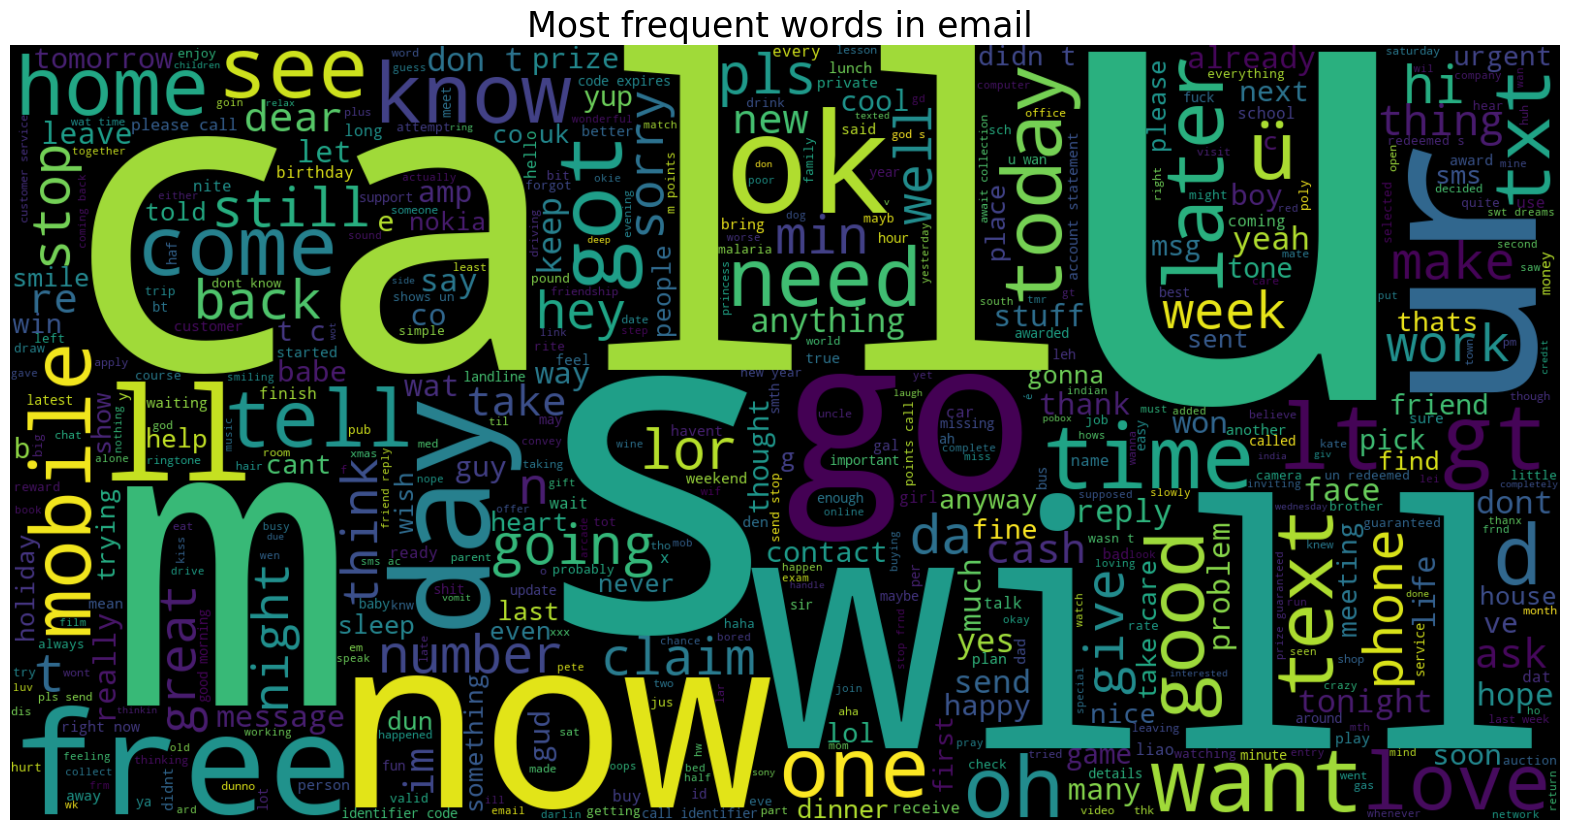

In [21]:
text=' '.join([word for word in df['Message_body']])
plt.figure(figsize=(20,15),facecolor='None')
wordcloud=WordCloud(max_words=500,width=1600,height=800).generate(text)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in email ', fontsize=25)
plt.show()

# splitting the data

In [22]:
from sklearn.model_selection import train_test_split


In [23]:
x = df['Message_body']
y = df['Label']

In [24]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [25]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(765,) (192,) (765,) (192,)


# vectorization

In [26]:
vectorization = TfidfVectorizer()

In [27]:
x_train = vectorization.fit_transform(x_train)
x_test = vectorization.transform(x_test)

In [28]:
x_test

<192x2429 sparse matrix of type '<class 'numpy.float64'>'
	with 2088 stored elements in Compressed Sparse Row format>

In [29]:
x_train

<765x2429 sparse matrix of type '<class 'numpy.float64'>'
	with 9316 stored elements in Compressed Sparse Row format>

In [30]:
print(x_test)

  (0, 979)	0.391828743135187
  (0, 617)	0.9200381709761284
  (1, 2329)	0.3398965272742855
  (1, 1375)	0.6688613827154398
  (1, 328)	0.5273762331160271
  (1, 53)	0.3987093053883
  (2, 2062)	0.25155840299589777
  (2, 979)	0.27647005271563546
  (2, 928)	0.4209754445825879
  (2, 610)	0.5844066883994654
  (2, 229)	0.5844066883994654
  (3, 2068)	0.5134326343932335
  (3, 1648)	0.6681457847663296
  (3, 1234)	0.38145359781920557
  (3, 272)	0.38008064006180786
  (4, 2419)	0.1932530501764656
  (4, 2329)	0.23517974249125062
  (4, 2061)	0.3330334643270593
  (4, 1589)	0.3762735147582658
  (4, 979)	0.18459212642815567
  (4, 672)	0.3762735147582658
  (4, 448)	0.4334337522476241
  (4, 428)	0.4334337522476241
  (4, 412)	0.32165984335366365
  (5, 2415)	0.1798198821098288
  :	:
  (186, 1403)	0.22631086927747257
  (186, 966)	0.24106708858964426
  (186, 290)	0.4515453150826127
  (187, 2397)	0.5308914217197341
  (187, 1419)	0.3298067779460168
  (187, 1234)	0.28818668809541226
  (187, 768)	0.3587095197585822


# model building

# Logestic regression

In [31]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()

In [33]:
modelLR = LR.fit(x_train,y_train)
y_predLR = modelLR.predict(x_test)

In [34]:
from sklearn.metrics import accuracy_score

In [35]:
print("the acc score is:", accuracy_score(y_test,y_predLR))

the acc score is: 0.9010416666666666


# DECISION TREE

In [36]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()

In [37]:
modelDT = DT.fit(x_train,y_train)
y_predDT = modelDT.predict(x_test)

In [38]:
print("the acc score of dt is:", accuracy_score(y_test,y_predDT))

the acc score of dt is: 0.9427083333333334


# RANDOM FOREST

In [39]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()

In [40]:
modelRF = RF.fit(x_train,y_train)
y_predRF = modelRF.predict(x_test)

In [41]:
print("the acc score of rf is:", accuracy_score(y_test,y_predRF))

the acc score of rf is: 0.9322916666666666


# naive bayes

In [45]:
from sklearn.naive_bayes import BernoulliNB
BNB = BernoulliNB()

In [48]:
modelBNB = BNB.fit(x_train,y_train)
y_predBNB = modelBNB.predict(x_test)

In [47]:
from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB()

In [49]:
modelMNB = MNB.fit(x_train,y_train)
y_predMNB = modelMNB.predict(x_test)

In [50]:
print("the acc score of bernoulli is:", accuracy_score(y_test,y_predBNB))
print("the acc score of multinomial is :", accuracy_score(y_test,y_predMNB))

the acc score of bernoulli is: 0.921875
the acc score of multinomial is : 0.9010416666666666


# boosting 

In [51]:
from sklearn.ensemble import GradientBoostingClassifier
GBC = GradientBoostingClassifier()

In [52]:
modelGBC = GBC.fit(x_train,y_train)
y_predGBC = modelGBC.predict(x_test)

In [53]:
from sklearn.ensemble import AdaBoostClassifier
ABC = AdaBoostClassifier()

In [54]:
modelABC = ABC.fit(x_train,y_train)
y_predABC = modelABC.predict(x_test)

In [55]:
print("the acc score of gradientboosting is :", accuracy_score(y_test,y_predGBC))

the acc score of gradientboosting is : 0.9427083333333334


In [56]:
print("the acc score of adaboosting is:", accuracy_score(y_test,y_predABC))

the acc score of adaboosting is: 0.953125


In [57]:
from xgboost import XGBClassifier
XGB = XGBClassifier()


In [58]:
modelXGB = XGB.fit(x_train,y_train)
y_predXGB = modelXGB.predict(x_test)

In [59]:
print("the acc score of xgb boost is:", accuracy_score(y_test,y_predXGB))

the acc score of xgb boost is: 0.9375


# performance analysis 

In [60]:
pt =[]

for i in [y_predLR,y_predXGB,y_predABC,y_predBNB,y_predDT,y_predGBC,y_predMNB,y_predRF]:
    pt.append(round(accuracy_score(y_test,i)*100,2))
print(pt)

[90.1, 93.75, 95.31, 92.19, 94.27, 94.27, 90.1, 93.23]


# prediction

from performance analysis , we got ADA boost classifier have the highest accuracy score with around 95.31% 

In [81]:
df['Message_body'].unique()

array(['rofl  its true to its name',
       'the guy did some bitching but i acted like i d be interested in buying something else next week and he gave it to us for free',
       'pity    was in mood for that  so   any other suggestions ',
       'will ü b going to esplanade fr home ',
       'this is the  time we have tried  contact u  u have won the   pound prize   claim is easy  call    only  per minute  bt national rate ',
       'reminder from   to get   pounds free call credit and details of great offers pls reply  this text with your valid name  house no and postcode',
       'huh y lei   ',
       'why don t you wait  til at least wednesday to see if you get your  ',
       'ard  like dat lor ',
       'ok lor    sony ericsson salesman    i ask shuhui then she say quite gd  use so i considering   ',
       'get me out of this dump heap  my mom decided to come to lowes  boring ',
       'anything lor  juz both of us lor ',
       'if you aren t here in the next   lt   gt   hour

In [74]:
df[500:510]

,Message_body,Label
500,uk break accommodationvouchers terms con...,1
501,i calls you later afternoon onwords mtnl serv...,0
502,but your brother transfered only lt gt ...,0
503,i dunno lei like dun haf,0
504,ok i also wan watch e pm show,0
505,havent stuck at orchard in my dad s car going...,0
506,sorry i ll call you later i am in meeting sir,0
507,i think i am disturbing her da,0
508,free video camera phones with half price line ...,1
509,geeeee your internet is really bad today ...,0


In [65]:
example = ["the guy did some bitching but i acted like "]
example_vectorized =vectorization.transform(example)
result = modelABC.predict(example_vectorized)
print(result)

if result==0:
    print('non-spam mails')
else:
    print('spam mails')

[0]
non-spam mails


In [77]:
example = ["uk break accommodationvouchers terms "]
example_vectorized =vectorization.transform(example)
result = modelABC.predict(example_vectorized)
print(result)

if result==1:
    print("spam mails")
else:
    print("non - spam mails")

[1]
spam mails


# conclusion 

For this NLP project, a variety of classification algorithms were employed to predict whether an email is spam or not.
 The accuracy scores for each model on the test set were as follows:

Logistic Regression: 90.1%

XGBoost: 93.75%

AdaBoost: 95.31%

Bernoulli Naive Bayes: 92.19%

Decision Tree: 94.27%

Gradient Boosting Classifier: 94.27%

Multinomial Naive Bayes: 90.1%

Random Forest: 93.23%

Among these models, AdaBoost achieved the highest accuracy of 95.31%.

Additionally, a sample email text was provided to the AdaBoost model for prediction, resulting in a classification of "spam mail".

In conclusion, the NLP project effectively distinguished between spam and non-spam emails, with AdaBoost demonstrating the highest accuracy among the models tested. This suggests that AdaBoost is a suitable algorithm for this particular task. Further details on the model's performance, such as precision, recall, and F1-score, along with insights into feature importance and potential areas for improvement, could enrich the project report. Additionally, considerations on deployment and scalability could be discussed for real-world applications.






